C:\Users\wolfu\AppData\Local\Temp\ipykernel_14464\441674717.py:21: DtypeWarning: Columns (16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Datos/dataset_modelo.csv')



Entrenando modelo 1 con capas ocultas: (64, 32)
Precisión: 0.9484

Entrenando modelo 2 con capas ocultas: (32, 16)
Precisión: 0.9490

Entrenando modelo 3 con capas ocultas: (128, 64, 32)
Precisión: 0.9492

Entrenando modelo 4 con capas ocultas: (16, 8)
Precisión: 0.9480

Entrenando modelo 5 con capas ocultas: (100,)
Precisión: 0.9484

--- Modelo Top 1 ---
Capas ocultas: (128, 64, 32)
Matriz de confusión:
[[154676   1622]
 [  6837   3314]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    156298
           1       0.67      0.33      0.44     10151

    accuracy                           0.95    166449
   macro avg       0.81      0.66      0.71    166449
weighted avg       0.94      0.95      0.94    166449



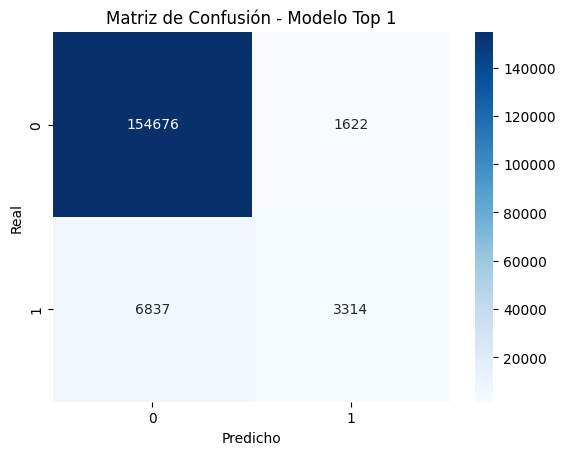


--- Modelo Top 2 ---
Capas ocultas: (32, 16)
Matriz de confusión:
[[154655   1643]
 [  6846   3305]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    156298
           1       0.67      0.33      0.44     10151

    accuracy                           0.95    166449
   macro avg       0.81      0.66      0.71    166449
weighted avg       0.94      0.95      0.94    166449



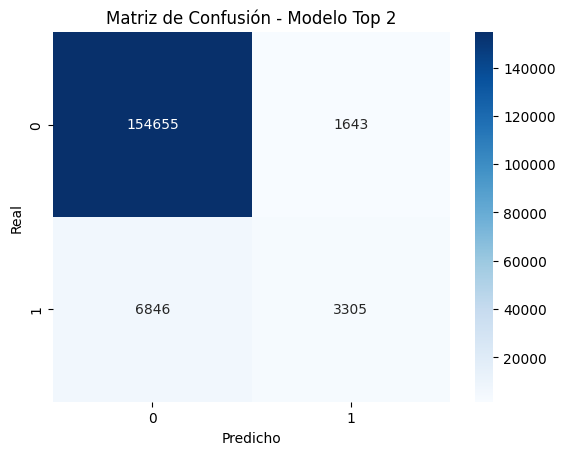


--- Modelo Top 3 ---
Capas ocultas: (100,)
Matriz de confusión:
[[154987   1311]
 [  7279   2872]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    156298
           1       0.69      0.28      0.40     10151

    accuracy                           0.95    166449
   macro avg       0.82      0.64      0.69    166449
weighted avg       0.94      0.95      0.94    166449



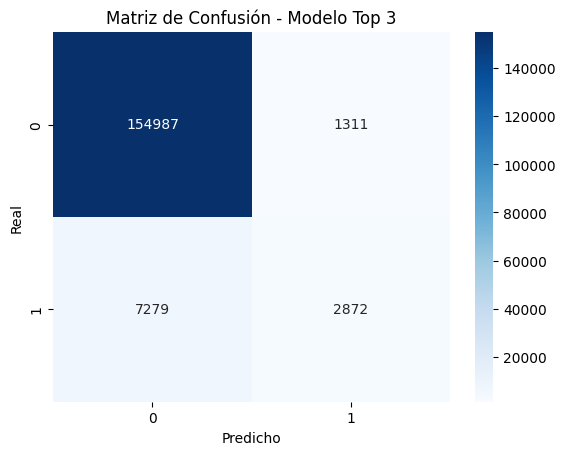

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Selección de características
selected_features = [
    "Ano Ocurrencia", 
    "Departamento de Ocurrencia", 
    "Edad del Hombre", 
    "Edad de la Mujer",
    "Escolaridad del Hombre",
    "Escolaridad de la Mujer"
]

df = pd.read_csv('../Datos/dataset_modelo.csv')

ocupacion_columns = ['Ocupacion del Hombre', 'Ocupacion de la Mujer']

df['Clase de Union'] = df['Clase de Union'].replace(9, np.nan)
df['Numero de Nupcias del Hombre'] = df['Numero de Nupcias del Hombre'].replace(9, np.nan)
df['Numero de Nupcias de la Mujer'] = df['Numero de Nupcias de la Mujer'].replace(9, np.nan)
df['Edad del Hombre'] = df['Edad del Hombre'].replace(999, np.nan)
df['Edad de la Mujer'] = df['Nacionalidad de la Mujer'].replace(999, np.nan)
df['Pueblo de Pertenencia del Hombre'] = df['Pueblo de Pertenencia del Hombre'].replace(9, np.nan)
df['Pueblo de Pertenencia de la Mujer'] = df['Pueblo de Pertenencia de la Mujer'].replace(9, np.nan)
df['Nacionalidad del Hombre'] = df['Nacionalidad del Hombre'].replace(9999, np.nan)
df['Nacionalidad de la Mujer'] = df['Nacionalidad de la Mujer'].replace(9999, np.nan)
df['Escolaridad del Hombre'] = df['Escolaridad del Hombre'].replace(9, np.nan)
df['Escolaridad de la Mujer'] = df['Escolaridad de la Mujer'].replace(9, np.nan)
df['Ocupacion del Hombre'] = df['Ocupacion del Hombre'].replace(99, np.nan)
df['Ocupacion de la Mujer'] = df['Ocupacion de la Mujer'].replace(99, np.nan)
df[ocupacion_columns] = df[ocupacion_columns].replace(["IGNORADO", "NEOG"], np.nan)
df['Area Geografica de la Ocurrencia'] = df['Area Geografica de la Ocurrencia'].replace(9, np.nan)

# Preparación de los datos
X = df[selected_features].copy()
y = df['divorcio']

# Imputación de valores faltantes
imputer = SimpleImputer(strategy='median')
X_imputado = pd.DataFrame(imputer.fit_transform(X), columns=selected_features)

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputado)

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Diferentes arquitecturas de redes
configuraciones = [
    (64, 32),
    (32, 16),
    (128, 64, 32),
    (16, 8),
    (100,)
]

resultados = []

# Entrenamiento y evaluación de modelos
for i, capas in enumerate(configuraciones):
    print(f"\nEntrenando modelo {i+1} con capas ocultas: {capas}")
    modelo = MLPClassifier(hidden_layer_sizes=capas, max_iter=500, random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Precisión: {acc:.4f}")
    resultados.append({
        'modelo': modelo,
        'capas': capas,
        'accuracy': acc,
        'y_pred': y_pred
    })

# Selección de los tres mejores modelos
mejores = sorted(resultados, key=lambda x: x['accuracy'], reverse=True)[:3]

# Evaluación detallada
for i, r in enumerate(mejores):
    print(f"\n--- Modelo Top {i+1} ---")
    print(f"Capas ocultas: {r['capas']}")
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, r['y_pred']))
    print("Reporte de clasificación:")
    print(classification_report(y_test, r['y_pred']))
    
    sns.heatmap(confusion_matrix(y_test, r['y_pred']), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - Modelo Top {i+1}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

